# MNIST 手寫數字辨識數據_訓練NN
### 目標: 準確率0.9以上

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#由Keras 讀入 MNIST
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#輸入格式整理
#標準神經網路不能吃矩陣，所以要將array拉長
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [5]:
#輸出格式整理
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
#標準化資料
x_train_1 = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_1 = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [7]:
#建構神經網路
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

## 比較方式
* 因為之前有聽過介紹NN的演講，隱藏層的active function:sigmoid、tanh、relu中，relu是比較好的，所以這裡只先單純比較輸出層的active function哪一種表現比較好 
* input layer 神經元輸入個數:784，輸出個數：4
* second layer 神經元輸入個數:4，輸出個數: 2
* output layer 神經元輸入個數:2，輸出個數：10
* optimizer 是採用'adam'，直接用 keras 裡 adam 參數的預設值(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
* loss function 是採用 mse 的方式

In [8]:
# model_1 : relu + softmax + Adam
model_1 = Sequential()
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation('relu'))
model_1.add(Dense(2))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))
model_1.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model_1_20 = model_1.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0824 - acc: 0.2110 - val_loss: 0.0802 - val_acc: 0.2404
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0790 - acc: 0.2581 - val_loss: 0.0783 - val_acc: 0.2811
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0776 - acc: 0.2826 - val_loss: 0.0772 - val_acc: 0.2970
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0767 - acc: 0.2971 - val_loss: 0.0767 - val_acc: 0.2917
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0760 - acc: 0.3053 - val_loss: 0.0761 - val_acc: 0.3078
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0756 - acc: 0.3118 - val_loss: 0.0756 - val_acc: 0.3144
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0

In [10]:
# model_2 : relu + elu
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation('relu'))
model_2.add(Dense(2))
model_2.add(Activation('relu'))
model_2.add(Dense(10))
model_2.add(Activation('elu'))
model_2.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model_2_20 = model_2.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0800 - acc: 0.2698 - val_loss: 0.0729 - val_acc: 0.3060
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0719 - acc: 0.3227 - val_loss: 0.0712 - val_acc: 0.3077
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0711 - acc: 0.3131 - val_loss: 0.0709 - val_acc: 0.3145
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0708 - acc: 0.3109 - val_loss: 0.0706 - val_acc: 0.3095
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0706 - acc: 0.3105 - val_loss: 0.0705 - val_acc: 0.3095
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0705 - acc: 0.3108 - val_loss: 0.0705 - val_acc: 0.3086
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0705 - acc: 0.3086 - val_loss: 0.0704 - val_acc

In [12]:
# model_3 : relu + selu
model_3 = Sequential()
model_3.add(Dense(4, input_dim=784))
model_3.add(Activation('relu'))
model_3.add(Dense(2))
model_3.add(Activation('relu'))
model_3.add(Dense(10))
model_3.add(Activation('selu'))
model_3.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model_3_20 = model_3.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0907 - acc: 0.1082 - val_loss: 0.0900 - val_acc: 0.1028
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0900 - acc: 0.1114 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0900 - acc: 0.1107 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0900 - acc: 0.1099 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0900 - acc: 0.1122 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0900 - acc: 0.1109 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0900 - acc: 0.1109 - val_loss: 0.0900 - val_acc

In [14]:
# model_4 : relu + softplus
model_4 = Sequential()
model_4.add(Dense(4, input_dim=784))
model_4.add(Activation('relu'))
model_4.add(Dense(2))
model_4.add(Activation('relu'))
model_4.add(Dense(10))
model_4.add(Activation('softplus'))
model_4.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model_4_20 = model_4.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.3161 - acc: 0.1090 - val_loss: 0.2291 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1857 - acc: 0.1124 - val_loss: 0.1537 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1358 - acc: 0.1124 - val_loss: 0.1219 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1135 - acc: 0.1124 - val_loss: 0.1067 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1024 - acc: 0.1124 - val_loss: 0.0989 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0966 - acc: 0.1124 - val_loss: 0.0947 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0935 - acc: 0.1124 - val_loss: 0.0924 - val_acc

In [16]:
# model_5 : relu + softsign
model_5 = Sequential()
model_5.add(Dense(4, input_dim=784))
model_5.add(Activation('relu'))
model_5.add(Dense(2))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softsign'))
model_5.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model_5_20 = model_5.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0875 - acc: 0.1611 - val_loss: 0.0818 - val_acc: 0.2137
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0794 - acc: 0.2427 - val_loss: 0.0743 - val_acc: 0.3005
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0740 - acc: 0.2996 - val_loss: 0.0737 - val_acc: 0.3003
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0735 - acc: 0.3006 - val_loss: 0.0734 - val_acc: 0.3017
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0733 - acc: 0.2997 - val_loss: 0.0733 - val_acc: 0.2996
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0731 - acc: 0.3022 - val_loss: 0.0731 - val_acc: 0.3010
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0730 - acc: 0.3001 - val_loss: 0.0731 - val_acc

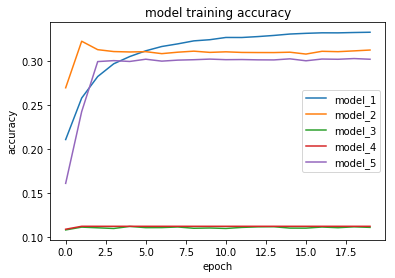

In [18]:
# 比較各模型的accuracy
plt.plot(model_1_20.history['acc'])
plt.plot(model_2_20.history['acc'])
plt.plot(model_3_20.history['acc'])
plt.plot(model_4_20.history['acc'])
plt.plot(model_5_20.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'], loc = 'best')
plt.show()

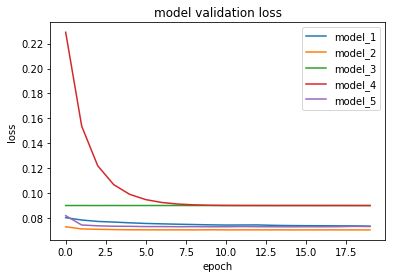

In [19]:
# 比較各模型的validation loss
plt.plot(model_1_20.history['val_loss'])
plt.plot(model_2_20.history['val_loss'])
plt.plot(model_3_20.history['val_loss'])
plt.plot(model_4_20.history['val_loss'])
plt.plot(model_5_20.history['val_loss'])

plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'], loc = 'best')
plt.show()

可以發現在神經元個數少的情況下，不管用甚麼樣的active function 準確率都沒有超過0.4，所以決定增加神經元個數

## 改變神經元個數
* input layer 神經元輸入個數:784，輸出個數：4
* second layer 神經元輸入個數:4，輸出個數: 2
* output layer 神經元輸入個數:2，輸出個數：10
* optimizer 是採用'adam'，直接用 keras 裡 adam 參數的預設值(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
* loss function 是採用 mse 的方式

In [20]:
# model_6 : relu + softmax + Adam
model_6 = Sequential()
model_6.add(Dense(20, input_dim=784))
model_6.add(Activation('relu'))
model_6.add(Dense(15))
model_6.add(Activation('relu'))
model_6.add(Dense(10))
model_6.add(Activation('softmax'))
model_6.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model_6_20 = model_6.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0262 - acc: 0.8162 - val_loss: 0.0125 - val_acc: 0.9197
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0116 - acc: 0.9262 - val_loss: 0.0104 - val_acc: 0.9332
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0097 - acc: 0.9387 - val_loss: 0.0093 - val_acc: 0.9404
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0085 - acc: 0.9460 - val_loss: 0.0084 - val_acc: 0.9459
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0078 - acc: 0.9504 - val_loss: 0.0079 - val_acc: 0.9494
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0073 - acc: 0.9539 - val_loss: 0.0081 - val_acc: 0.9471
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0069 - acc: 0.9570 - val_loss: 0.0076 - val_acc

In [22]:
# model_7 : relu + elu
model_7 = Sequential()
model_7.add(Dense(20, input_dim=784))
model_7.add(Activation('relu'))
model_7.add(Dense(15))
model_7.add(Activation('relu'))
model_7.add(Dense(10))
model_7.add(Activation('elu'))
model_7.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model_7_20 = model_7.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0398 - acc: 0.7776 - val_loss: 0.0187 - val_acc: 0.9202
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0162 - acc: 0.9267 - val_loss: 0.0143 - val_acc: 0.9340
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0136 - acc: 0.9358 - val_loss: 0.0127 - val_acc: 0.9400
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0122 - acc: 0.9415 - val_loss: 0.0117 - val_acc: 0.9429
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0110 - acc: 0.9454 - val_loss: 0.0109 - val_acc: 0.9444
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0103 - acc: 0.9490 - val_loss: 0.0107 - val_acc: 0.9433
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0098 - acc: 0.9511 - val_loss: 0.0102 - val_acc

In [24]:
# model_8 : relu + selu
model_8 = Sequential()
model_8.add(Dense(20, input_dim=784))
model_8.add(Activation('relu'))
model_8.add(Dense(15))
model_8.add(Activation('relu'))
model_8.add(Dense(10))
model_8.add(Activation('selu'))
model_8.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
model_8_20 = model_8.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0589 - acc: 0.5990 - val_loss: 0.0356 - val_acc: 0.7676
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0285 - acc: 0.8590 - val_loss: 0.0225 - val_acc: 0.9077
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0197 - acc: 0.9176 - val_loss: 0.0170 - val_acc: 0.9290
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0163 - acc: 0.9297 - val_loss: 0.0149 - val_acc: 0.9355
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0145 - acc: 0.9346 - val_loss: 0.0138 - val_acc: 0.9373
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0135 - acc: 0.9377 - val_loss: 0.0133 - val_acc: 0.9371
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0129 - acc: 0.9406 - val_loss: 0.0126 - val_acc

In [26]:
# model_9 : relu + softplus
model_9 = Sequential()
model_9.add(Dense(20, input_dim=784))
model_9.add(Activation('relu'))
model_9.add(Dense(15))
model_9.add(Activation('relu'))
model_9.add(Dense(10))
model_9.add(Activation('softplus'))
model_9.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
model_9_20 = model_9.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0639 - acc: 0.5719 - val_loss: 0.0408 - val_acc: 0.7585
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0333 - acc: 0.8108 - val_loss: 0.0258 - val_acc: 0.8843
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0223 - acc: 0.8976 - val_loss: 0.0197 - val_acc: 0.9096
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0189 - acc: 0.9133 - val_loss: 0.0179 - val_acc: 0.9180
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0172 - acc: 0.9206 - val_loss: 0.0177 - val_acc: 0.9209
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0162 - acc: 0.9249 - val_loss: 0.0160 - val_acc: 0.9239
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0152 - acc: 0.9290 - val_loss: 0.0152 - val_acc

In [28]:
# model_10 : relu + softsign
model_10 = Sequential()
model_10.add(Dense(20, input_dim=784))
model_10.add(Activation('relu'))
model_10.add(Dense(15))
model_10.add(Activation('relu'))
model_10.add(Dense(10))
model_10.add(Activation('softsign'))
model_10.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
model_10_20 = model_10.fit(x_train_1, y_train, batch_size = 100,
                        epochs = 20, verbose = 1,
                         validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0482 - acc: 0.7758 - val_loss: 0.0292 - val_acc: 0.8972
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0251 - acc: 0.9026 - val_loss: 0.0210 - val_acc: 0.9185
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0194 - acc: 0.9170 - val_loss: 0.0173 - val_acc: 0.9242
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0165 - acc: 0.9247 - val_loss: 0.0152 - val_acc: 0.9270
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0146 - acc: 0.9304 - val_loss: 0.0137 - val_acc: 0.9328
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0132 - acc: 0.9363 - val_loss: 0.0127 - val_acc: 0.9357
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0121 - acc: 0.9399 - val_loss: 0.0122 - val_acc

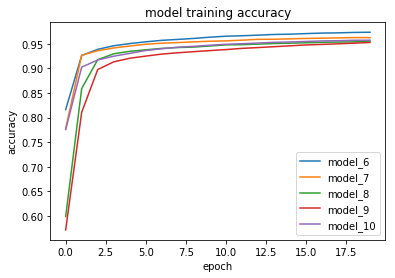

In [30]:
# 比較各模型的accuracy
plt.plot(model_6_20.history['acc'])
plt.plot(model_7_20.history['acc'])
plt.plot(model_8_20.history['acc'])
plt.plot(model_9_20.history['acc'])
plt.plot(model_10_20.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_6', 'model_7', 'model_8', 'model_9', 'model_10'], loc = 'best')
plt.show()

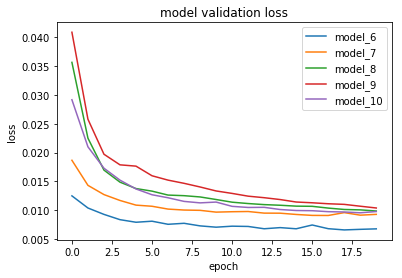

In [31]:
# 比較各模型的validation loss
plt.plot(model_6_20.history['val_loss'])
plt.plot(model_7_20.history['val_loss'])
plt.plot(model_8_20.history['val_loss'])
plt.plot(model_9_20.history['val_loss'])
plt.plot(model_10_20.history['val_loss'])

plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_6', 'model_7', 'model_8', 'model_9', 'model_10'], loc = 'best')
plt.show()

In [32]:
score = model_6.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 35us/step
loss: 0.010181933044124361
accuracy: 0.9491


* 可以發現訓練最好的模型是model 6， active function 是 relu + softmax, optimizer 是 Adam
* 準確率有達到94.9%

In [33]:
# output
from ipywidgets import interact_manual
predict = model_6.predict_classes(x_test)
def test(testNum):
    plt.imshow(x_test[testNum].reshape(28,28), cmap='Greys')
    print('神經網路判斷為: ', predict[testNum])
interact_manual(test, testNum = (0,9999))

interactive(children=(IntSlider(value=4999, description='testNum', max=9999), Button(description='Run Interact…

<function __main__.test(testNum)>